# Data analytices project on Diwali sales 

In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Program Files\Python311\Diwali Sales Data.csv" , encoding = 'unicode_escape')

In [6]:
df.shape

(11251, 15)

In [7]:
df.size


168765

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
df.drop(['Status','unnamed1'],axis = 1 , inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [11]:
#cheaking null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
df.shape

(11251, 13)

In [13]:
#droping null values
df.dropna(inplace = True)

In [14]:
df.shape

(11239, 13)

In [15]:
#changing the data type of Amount
df['Amount'] = df['Amount'].astype(int)
df['Amount'].dtype

dtype('int32')

In [16]:
#to view number of columns
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [17]:
# renaming the Marital_status to shadi status
df.rename(columns = {'Marital_Status' : 'shadi'}).head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,shadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [18]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [19]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


### Ecpliloratory Data Analysis  



### Gender

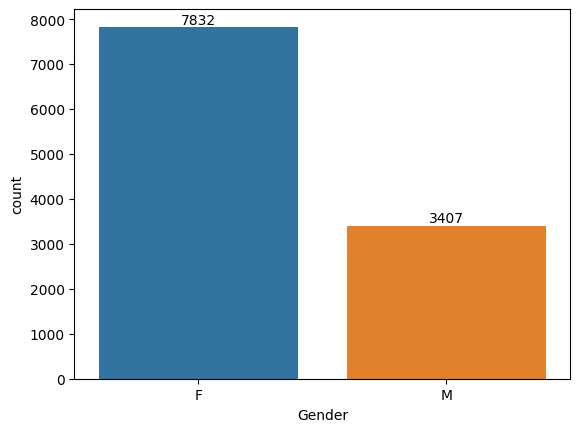

In [20]:
ax =sns.countplot(x = 'Gender', data = df)
#for assining the count of male and female on top of the bar for labels
for bars in ax.containers:
    ax.bar_label(bars)
    


<Axes: xlabel='Gender', ylabel='Amount'>

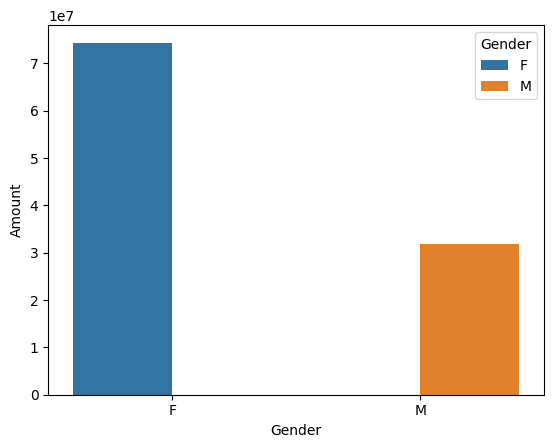

In [21]:
gen_sales = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False) 
sns.barplot(x = 'Gender',y = 'Amount',data = gen_sales,hue = 'Gender')

### from above graps we can see that the most of the buyers are women and the amount spent by women is grater than men

### Age

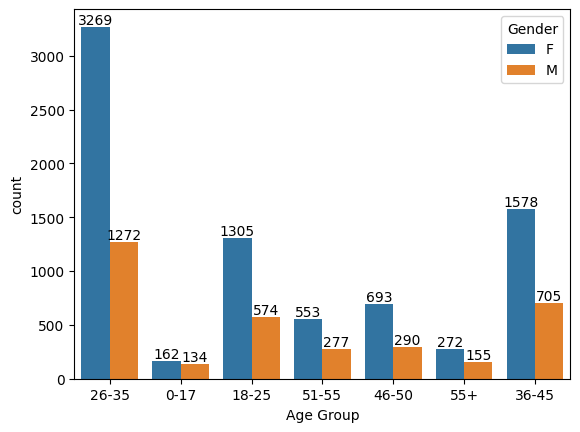

In [22]:
ax = sns.countplot (x = 'Age Group',data = df, hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

In [23]:
age_sales = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
age_sales

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<Axes: xlabel='Age Group', ylabel='Amount'>

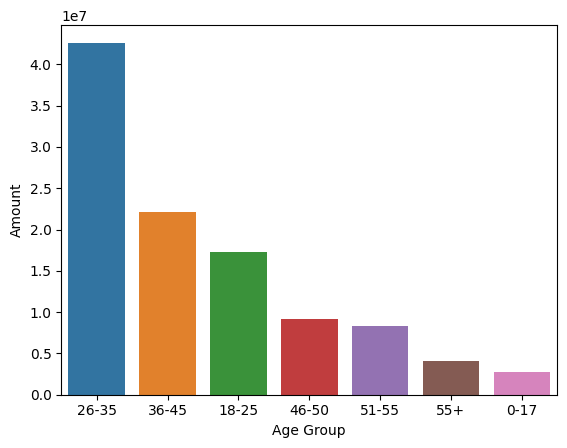

In [24]:
sns.barplot(x = 'Age Group', y = 'Amount', data = age_sales )

### we saw that the most of the buyers belongs to age group og  26-35 and there are women most in that age group

### State

<Axes: xlabel='State', ylabel='Orders'>

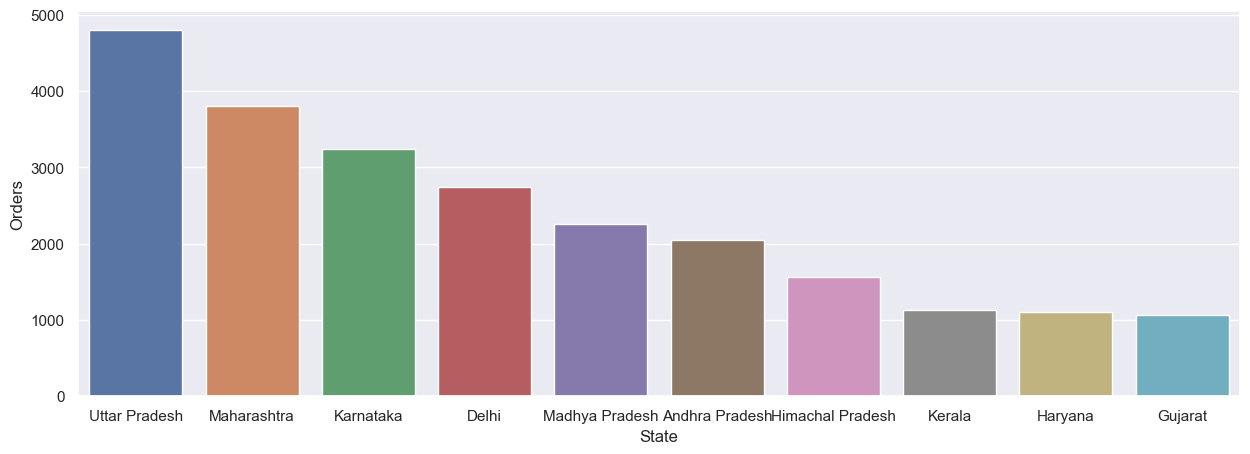

In [25]:
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sales_state

sns.set(rc={'figure.figsize': (15,5)})
sns.barplot(x = 'State', y = 'Orders' ,data = sales_state)

<Axes: xlabel='State', ylabel='Amount'>

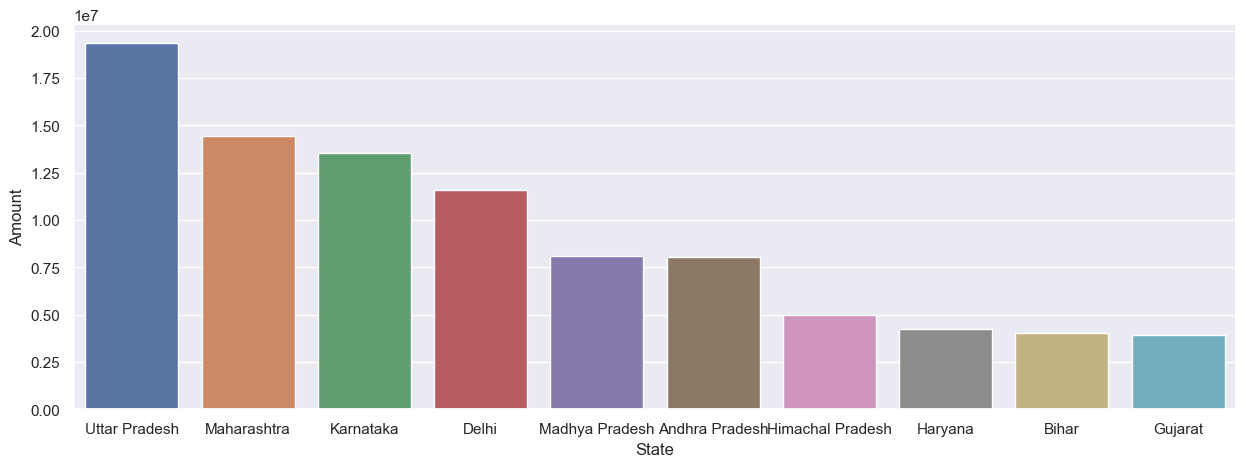

In [26]:
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sales_state

sns.set(rc={'figure.figsize': (15,5)})
sns.barplot(x = 'State', y = 'Amount' ,data = sales_state)

### From above graphs we can see that most orders were coming from the utter Pradesh and Maharastra and Karnataka but where as the amount  first 7 places remains same whereas in 8th place the haryana spend more amount comapared to karala which done more orders.

### maratial status  

In [27]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

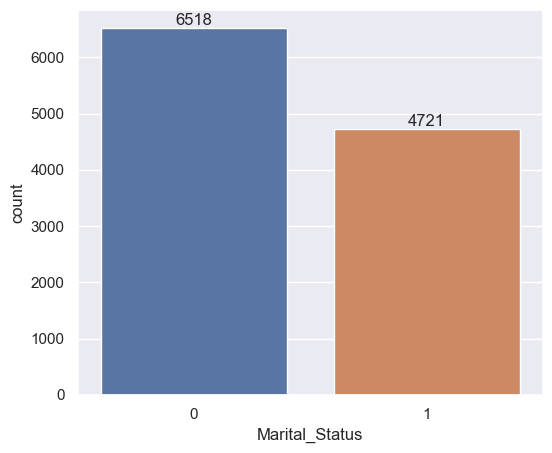

In [32]:
ax = sns.countplot(x = 'Marital_Status',data =df )
sns.set(rc = {'figure.figsize': (7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

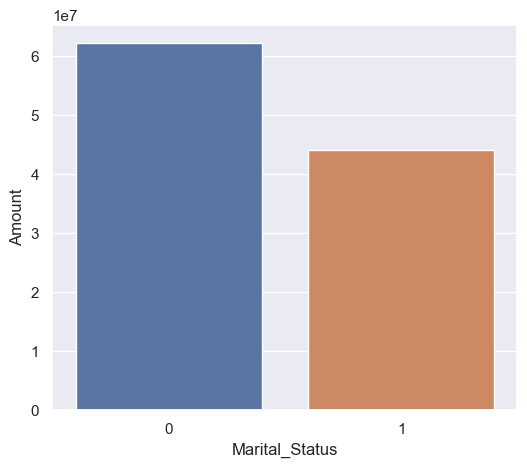

In [30]:
sales_marriage = df.groupby(['Marital_Status'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sales_state

sns.set(rc={'figure.figsize': (6,5)})
sns.barplot(x = 'Marital_Status', y = 'Amount' ,data = sales_marriage)

In [31]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### Occupation 

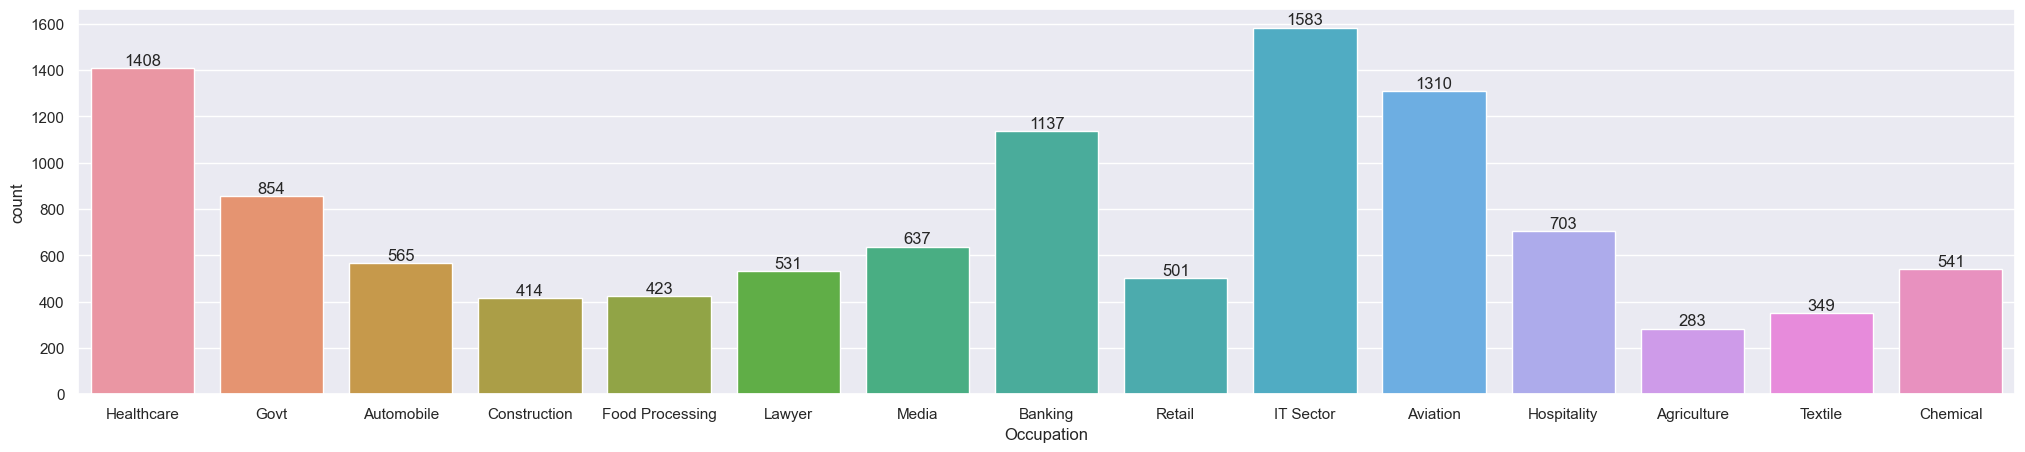

In [38]:
ax = sns.countplot(x = 'Occupation',data = df)
sns.set(rc ={'figure.figsize':(25,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

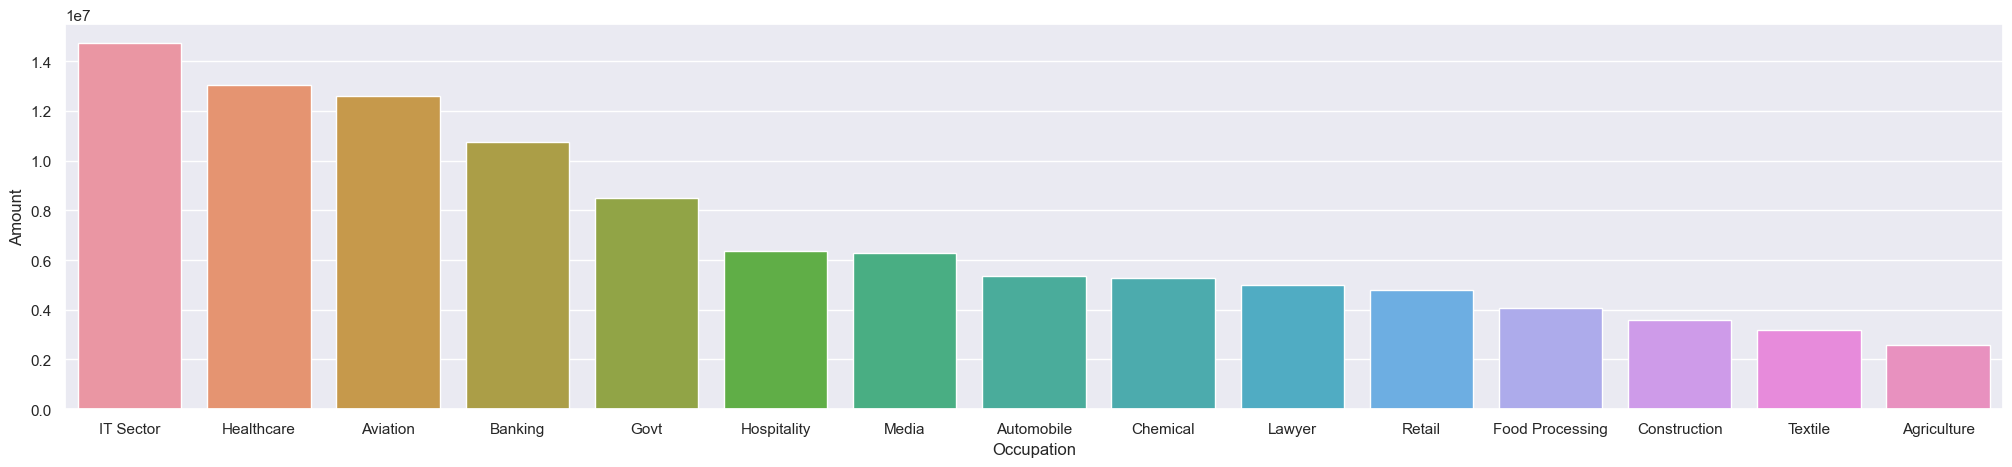

In [42]:
occupation_sales = df.groupby(['Occupation'], as_index = False).sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Occupation',y = 'Amount',data = occupation_sales)

 From above both graphs we can say that the IT sector  and Healthcare occupation peoples do more shoping and same as spent more money  

### Producrt Catogori

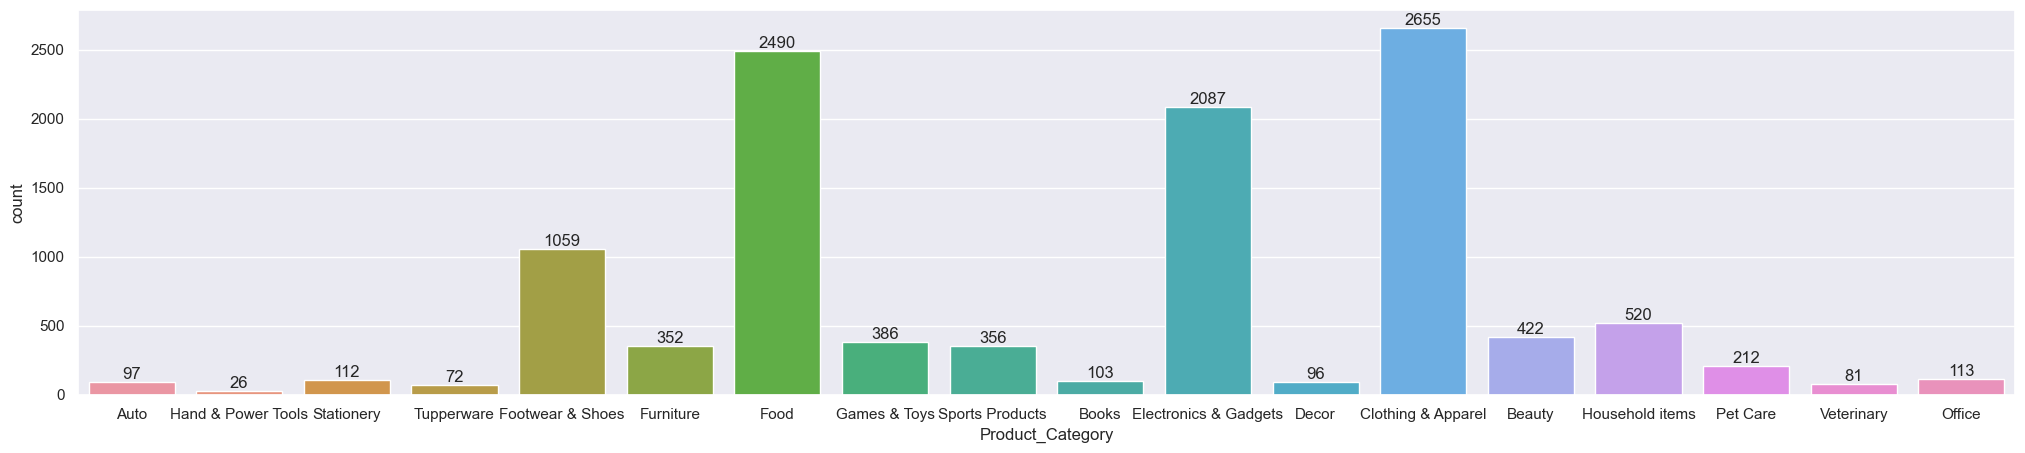

In [48]:
ax = sns.countplot(x = 'Product_Category',data = df)
sns.set(rc ={'figure.figsize':(25,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

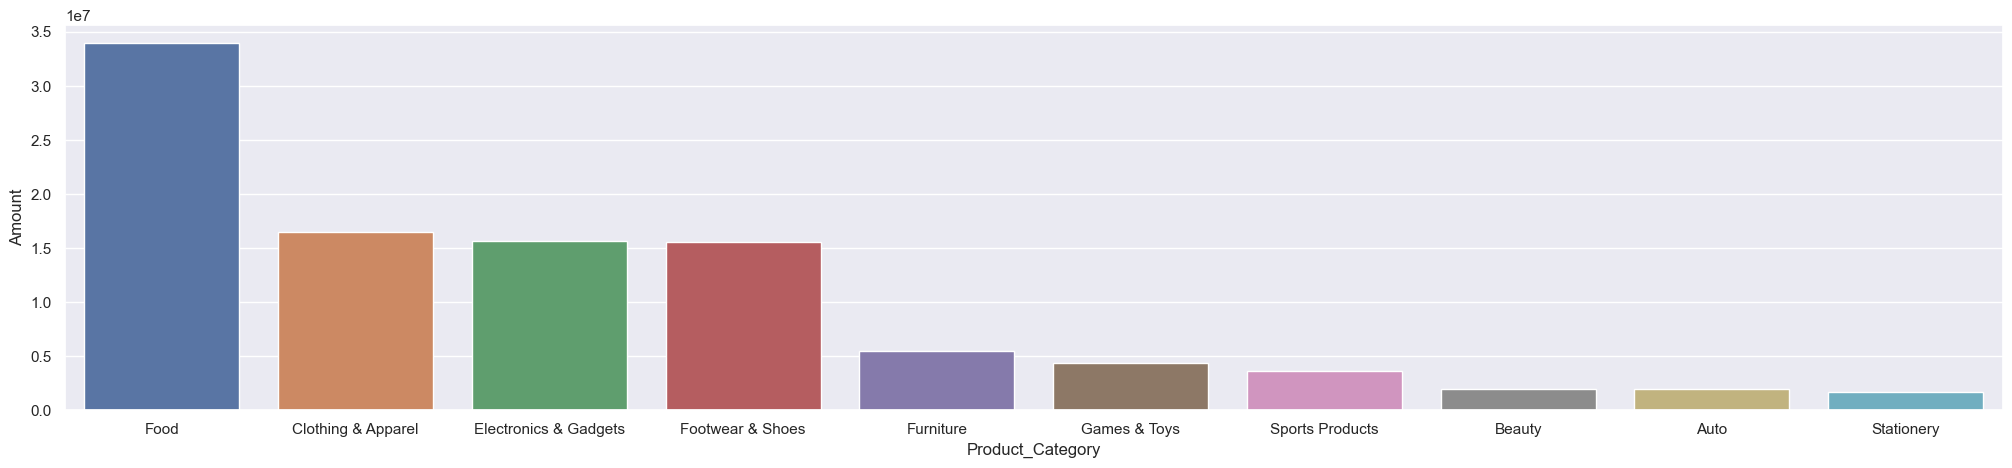

In [47]:
prod_cat_sales = df.groupby(['Product_Category'], as_index = False).sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.barplot(x = 'Product_Category',y = 'Amount',data = prod_cat_sales)

From above graphs we can say that most products that were sold are clothing,food and than on the Electronics & gadgets and whereas we can see from sales graph that most amount was spent on the Food with grater difference with Clothing & Gadgets

# product_Id

<Axes: xlabel='Product_ID', ylabel='Orders'>

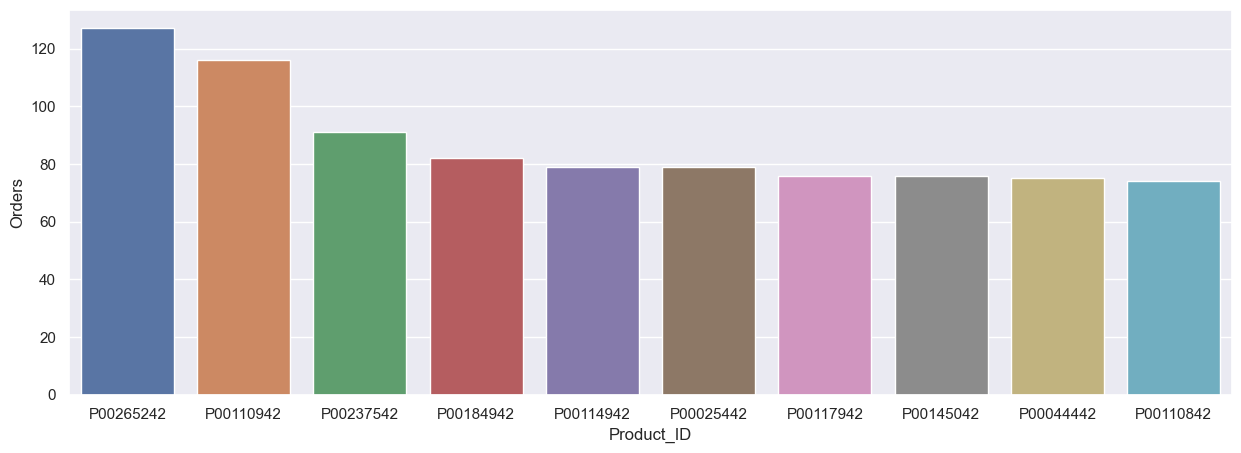

In [56]:
prod_id_sales = df.groupby(['Product_ID'], as_index = False).sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.set(rc ={'figure.figsize':(15,5)})
sns.barplot(x = 'Product_ID',y = 'Orders',data = prod_id_sales)

## Conclusion

### From our analysis we can say that married women with age group between 25-36 from utterpradesh and maharastra doing work in IT-sector and healthcare jobs been spent more money and purchaged more products